# Стратегия Trend
подход к торговле, который фокусируется на выявлении и следовании за существующим направлением движения цены на рынке

Основывается на принципе "тренд - твой друг", предполагая, что существующее направление движения цены с большей вероятностью продолжится, чем развернется
Использует технические индикаторы для подтверждения трендов и определения точек входа/выхода

* Эффективна в периоды сильного однонаправленного движения цены (бычьи или медвежьи тренды)
* Менее результативна во время боковых движений или высокой волатильности без направленного тренда

## Simple Moving Average (SMA):

$SMA = (P₁ + P₂ + ... + Pₙ) / n$, где 
* P₁, P₂, ..., Pₙ - цены закрытия за n периодов, а n - количество периодов
  
## Exponential Moving Average (EMA):
$EMA = P × k + EMA₍ᵖᵣᵉᵛ₎ × (1 - k)$, где
* P - текущая цена, EMA₍ᵖᵣᵉᵛ₎ - предыдущее значение EMA,
* k - весовой коэффициент (k = 2 / (n + 1))

### Другие типы скользящих средних:
* Weighted Moving Average (WMA): придает больший вес более свежим данным по линейной шкале
* Volume-Weighted Moving Average (VWMA): учитывает объем торгов при расчете
* Hull Moving Average (HMA): уменьшает отставание, используя взвешенные скользящие средние
* Variable Moving Average (VMA): адаптирует чувствительность к изменениям рынка
* Triangular Moving Average (TMA): применяет двойное сглаживание для снижения шума

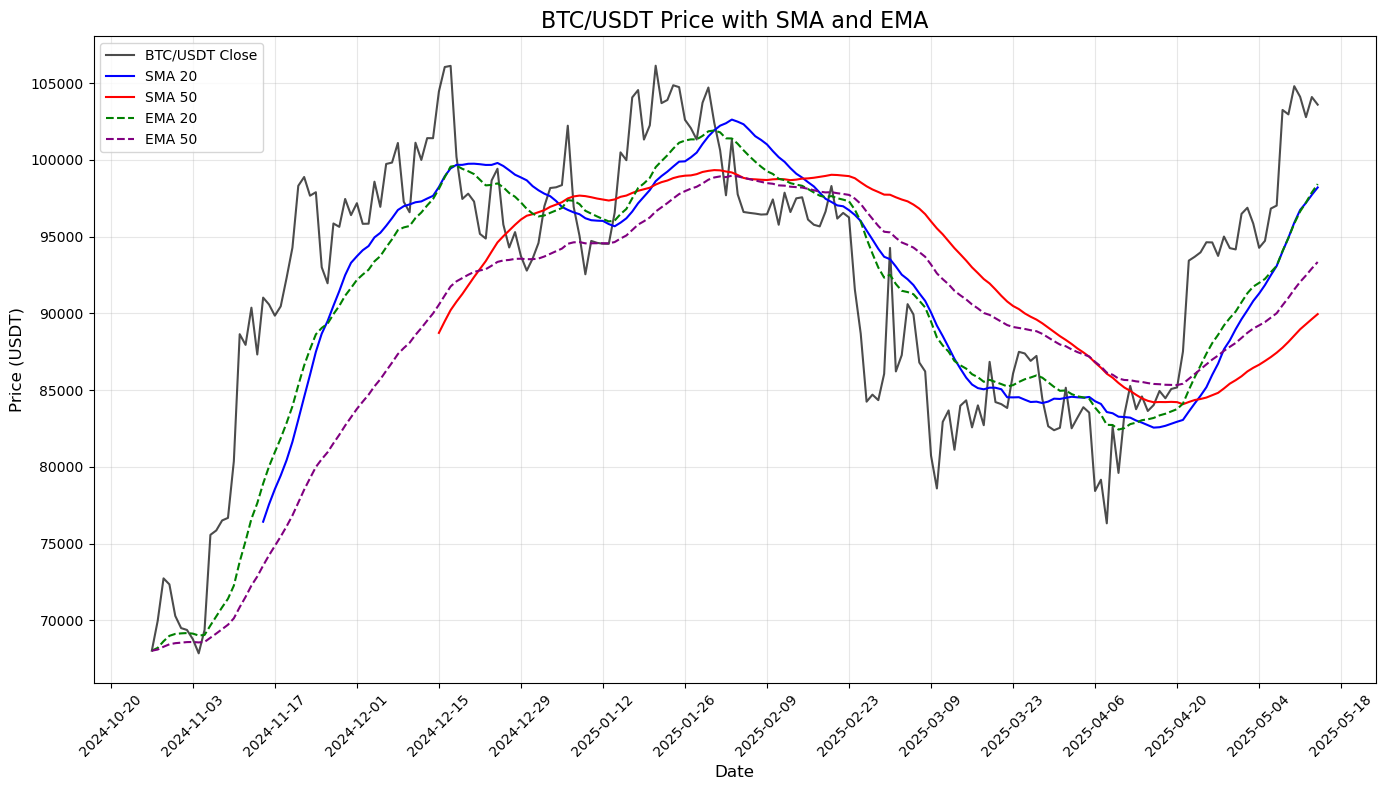

Chart generated successfully!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests
from datetime import datetime
import time

# Function to get BTC historical data from Binance public API
def get_binance_data(symbol='BTCUSDT', interval='1d', limit=500):
    """
    Fetch historical kline/candlestick data from Binance
    
    Parameters:
        symbol (str): Trading pair symbol (default: 'BTCUSDT')
        interval (str): Kline/candlestick interval (default: '1d', meaning 1 day)
        limit (int): Number of data points to fetch (default: 500, max: 1000)
    
    Returns:
        pd.DataFrame: DataFrame containing the historical data
    """
    base_url = 'https://api.binance.com/api/v3/klines'
    
    # Parameters for the API request
    params = {
        'symbol': symbol,
        'interval': interval,
        'limit': limit
    }
    
    # Make the request
    response = requests.get(base_url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Convert the response to a list of lists
        data = response.json()
        
        # Create a DataFrame
        df = pd.DataFrame(data, columns=[
            'open_time', 'open', 'high', 'low', 'close', 'volume',
            'close_time', 'quote_asset_volume', 'number_of_trades',
            'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
        ])
        
        # Convert timestamp to datetime
        df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
        df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
        
        # Convert string columns to numeric
        for col in ['open', 'high', 'low', 'close', 'volume']:
            df[col] = pd.to_numeric(df[col])
        
        return df
    else:
        print(f"Error fetching data: {response.status_code}")
        return None

# Get BTC data
df = get_binance_data(symbol='BTCUSDT', interval='1d', limit=200)

# Calculate SMA for 20 and 50 periods
df['SMA_20'] = df['close'].rolling(window=20).mean()
df['SMA_50'] = df['close'].rolling(window=50).mean()

# Calculate EMA for 20 and 50 periods
df['EMA_20'] = df['close'].ewm(span=20, adjust=False).mean()
df['EMA_50'] = df['close'].ewm(span=50, adjust=False).mean()

# Create the plot
plt.figure(figsize=(14, 8))

# Plot the closing price
plt.plot(df['open_time'], df['close'], label='BTC/USDT Close', color='black', alpha=0.7)

# Plot the moving averages
plt.plot(df['open_time'], df['SMA_20'], label='SMA 20', color='blue', linewidth=1.5)
plt.plot(df['open_time'], df['SMA_50'], label='SMA 50', color='red', linewidth=1.5)
plt.plot(df['open_time'], df['EMA_20'], label='EMA 20', color='green', linewidth=1.5, linestyle='--')
plt.plot(df['open_time'], df['EMA_50'], label='EMA 50', color='purple', linewidth=1.5, linestyle='--')

# Set title and labels
plt.title('BTC/USDT Price with SMA and EMA', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USDT)', fontsize=12)

# Format the date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=14))
plt.xticks(rotation=45)

# Add grid
plt.grid(True, alpha=0.3)

# Add legend
plt.legend(loc='upper left')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Uncomment to save the figure
# plt.savefig('btc_sma_ema.png', dpi=300, bbox_inches='tight')

print("Chart generated successfully!")

## SAR (Parabolic Stop and Reverse) - это технический индикатор, разработанный Уэллсом Уайлдером

### Как работает индикатор Parabolic SAR?
Parabolic SAR это Stop and Reversal стремится распознать подходящие моменты для закрытия текущей позиции и открытия противоположной. По своей сути индикатор аналогичен скользящим средним с той разницей, что он движется с разным ускорением.

##Что показывает индикатор SAR?
Индикатор SAR отображается на графике в виде ряда точек. Если точки SAR ниже текущей рыночной цены, они указывают на восходящий тренд; если выше —  на нисходящий тренд. Открывайте позицию на покупку, когда цена пробивает точки SAR снизу вверх, и на продажу, когда сверху вниз.

### SARNEW = SARCURRENT + AF x (EPCURRENT - SARCURRENT), 

* AF = коэффициент ускорения – изменяющееся значение, которое увеличивается с шагом, установленным для каждого периода, когда сделка достигает новый максимум (для длинных позиций) или новый минимум (для коротких позиций). Уайлдер предложил 0.02 в качестве начального значения AF, которое затем будет увеличиваться на 0.02 с каждым шагом, пока не достигнет максимального значения 0.2
* EP = экстремум, максимальное или минимальное значение цены, наблюдаемое в текущем тренде (максимум при восходящем тренде, минимум при нисходящем тренде)

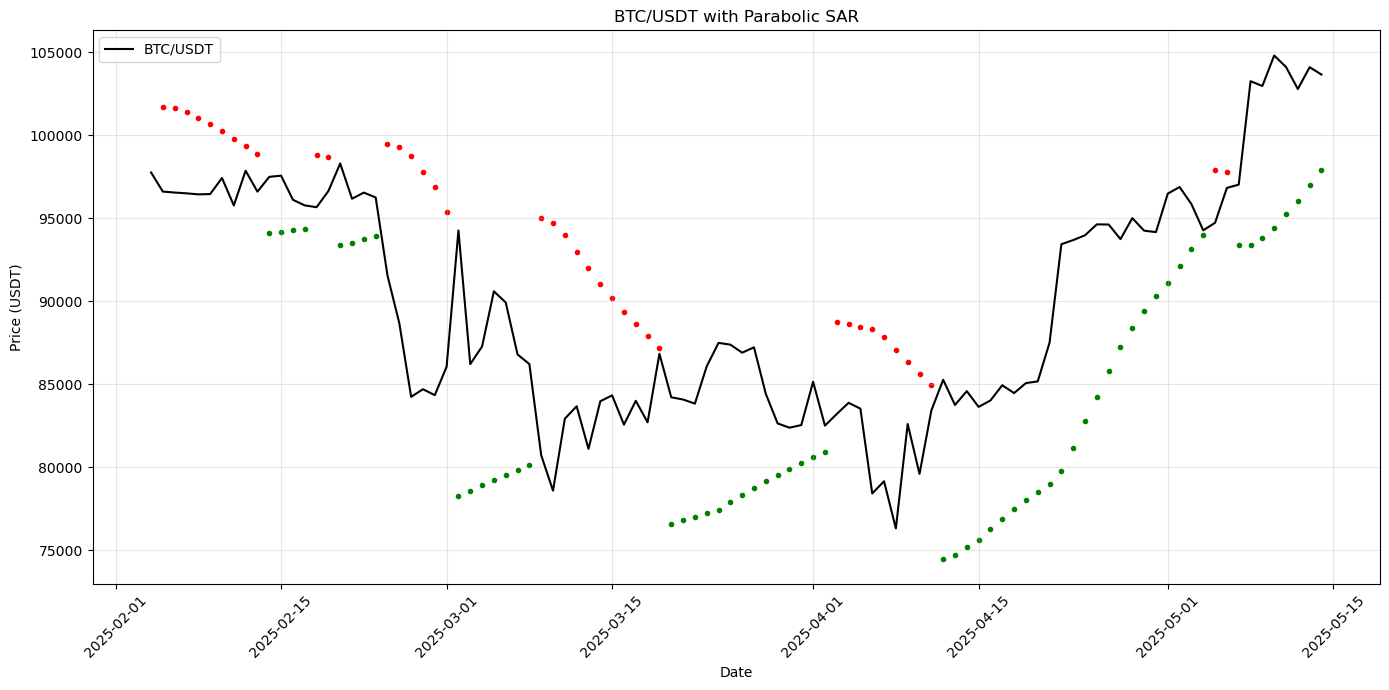

    open_time      close           sar  trend
90 2025-05-05   94733.68  97895.680000   -1.0
91 2025-05-06   96834.02  97808.048400   -1.0
92 2025-05-07   97030.50  93377.000000    1.0
93 2025-05-08  103261.60  93377.000000    1.0
94 2025-05-09  102971.99  93807.750400    1.0
95 2025-05-10  104809.53  94440.963376    1.0
96 2025-05-11  104118.00  95284.451906    1.0
97 2025-05-12  102791.32  96060.461353    1.0
98 2025-05-13  104103.72  97036.360218    1.0
99 2025-05-14  103661.27  97914.669196    1.0


In [3]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Function to fetch BTC data from Binance API
def fetch_binance_data(symbol='BTCUSDT', interval='1d', limit=200):
    base_url = 'https://api.binance.com/api/v3/klines'
    params = {
        'symbol': symbol,
        'interval': interval,
        'limit': limit
    }
    
    response = requests.get(base_url, params=params)
    data = response.json()
    
    # Convert to dataframe
    df = pd.DataFrame(data, columns=[
        'open_time', 'open', 'high', 'low', 'close', 'volume',
        'close_time', 'quote_asset_volume', 'number_of_trades',
        'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
    ])
    
    # Convert types
    df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
    df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
    
    # Convert prices to float
    numeric_columns = ['open', 'high', 'low', 'close', 'volume']
    df[numeric_columns] = df[numeric_columns].astype(float)
    
    return df

# Calculate Parabolic SAR
def calculate_parabolic_sar(df, af_start=0.02, af_step=0.02, af_max=0.2):
    high = df['high'].values
    low = df['low'].values
    close = df['close'].values
    
    # Initialize arrays
    sar = np.zeros_like(close)
    trend = np.zeros_like(close)  # 1 for uptrend, -1 for downtrend
    ep = np.zeros_like(close)     # extreme point
    af = np.zeros_like(close)     # acceleration factor
    
    # Initial trend determination using first two bars
    if close[1] > close[0]:
        trend[1] = 1  # Uptrend
        sar[1] = low[0]  # SAR starts at prior low
        ep[1] = high[1]  # EP starts at current high
    else:
        trend[1] = -1  # Downtrend
        sar[1] = high[0]  # SAR starts at prior high
        ep[1] = low[1]  # EP starts at current low
    
    af[1] = af_start
    
    # Calculate SAR values
    for i in range(2, len(close)):
        # Previous values
        sar_prev = sar[i-1]
        trend_prev = trend[i-1]
        ep_prev = ep[i-1]
        af_prev = af[i-1]
        
        # Current SAR = Previous SAR + Previous AF * (Previous EP - Previous SAR)
        sar[i] = sar_prev + af_prev * (ep_prev - sar_prev)
        
        # Uptrend
        if trend_prev == 1:
            # Check for trend reversal
            if sar[i] > low[i]:
                # Trend reversal to downtrend
                trend[i] = -1
                sar[i] = max(ep_prev, high[i])
                ep[i] = low[i]
                af[i] = af_start
            else:
                # Continue uptrend
                trend[i] = 1
                # Ensure SAR is below the recent lows
                sar[i] = min(sar[i], low[i-1], low[i-2] if i > 2 else low[i-1])
                
                # Update extreme point and acceleration factor
                if high[i] > ep_prev:
                    ep[i] = high[i]
                    af[i] = min(af_prev + af_step, af_max)
                else:
                    ep[i] = ep_prev
                    af[i] = af_prev
        
        # Downtrend
        else:
            # Check for trend reversal
            if sar[i] < high[i]:
                # Trend reversal to uptrend
                trend[i] = 1
                sar[i] = min(ep_prev, low[i])
                ep[i] = high[i]
                af[i] = af_start
            else:
                # Continue downtrend
                trend[i] = -1
                # Ensure SAR is above recent highs
                sar[i] = max(sar[i], high[i-1], high[i-2] if i > 2 else high[i-1])
                
                # Update extreme point and acceleration factor
                if low[i] < ep_prev:
                    ep[i] = low[i]
                    af[i] = min(af_prev + af_step, af_max)
                else:
                    ep[i] = ep_prev
                    af[i] = af_prev
    
    return sar, trend

# Fetch BTC data
df = fetch_binance_data(symbol='BTCUSDT', interval='1d', limit=100)

# Calculate Parabolic SAR
sar, trend = calculate_parabolic_sar(df)

# Add to dataframe
df['sar'] = sar
df['trend'] = trend

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['open_time'], df['close'], label='BTC/USDT', color='black')

# Plot Parabolic SAR points
uptrend_indices = df.index[df['trend'] == 1]
downtrend_indices = df.index[df['trend'] == -1]

plt.scatter(df.loc[uptrend_indices, 'open_time'], 
            df.loc[uptrend_indices, 'sar'], 
            color='green', 
            marker='.')

plt.scatter(df.loc[downtrend_indices, 'open_time'], 
            df.loc[downtrend_indices, 'sar'], 
            color='red', 
            marker='.')

plt.title('BTC/USDT with Parabolic SAR')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Print the last few rows to see current SAR values
print(df[['open_time', 'close', 'sar', 'trend']].tail(10))

# Ichimoku Kinko Hyo
Ichimoku Kinko Hyo (в переводе "баланс одним взглядом") - комплексный индикатор, разработанный Гоичи Хосода для определения тренда, уровней поддержки/сопротивления и генерации сигналов.

### Индикатор Ишимоку состоит из 5 основных линий и облака. Каждая линия рассчитывается по определенным математическим моделям

* Tenkan-Sen (Быстрая линия) - (самый высокий максимум + самый низкий минимум)/2 за последние 9 периодов
* Kijun-Sen (Медленная линия) - (самый высокий максимум + самый низкий минимум)/2 за последние 22 периода 
* Senkou-Span-A (Первая ведущая линия) - (Tenkan-Sen + Kijun-Sen)/2, сдвинутое вперед на 26 периодов.
* Senkou-Span-B (Вторая ведущая линия) - (самый высокий максимум + самый низкий минимум)/2 за выбранный период (по умолчанию - 52), сдвинутое вперед на 26 периодов.
* Chinkou Span (Запаздывающая линия) - Текущая цена, сдвинутая на 26 периодов назад

### Подтверждение силы тренда:
* Все линии выстраиваются в одном направлении
* Chikou Span находится выше/ниже цены и облака
* Будущее облако меняет направление (плоское/восходящее/нисходящее)
    

Fetching BTC data from Binance API...
Calculating Ichimoku Kinko Hyo indicators...
Plotting Ichimoku chart...


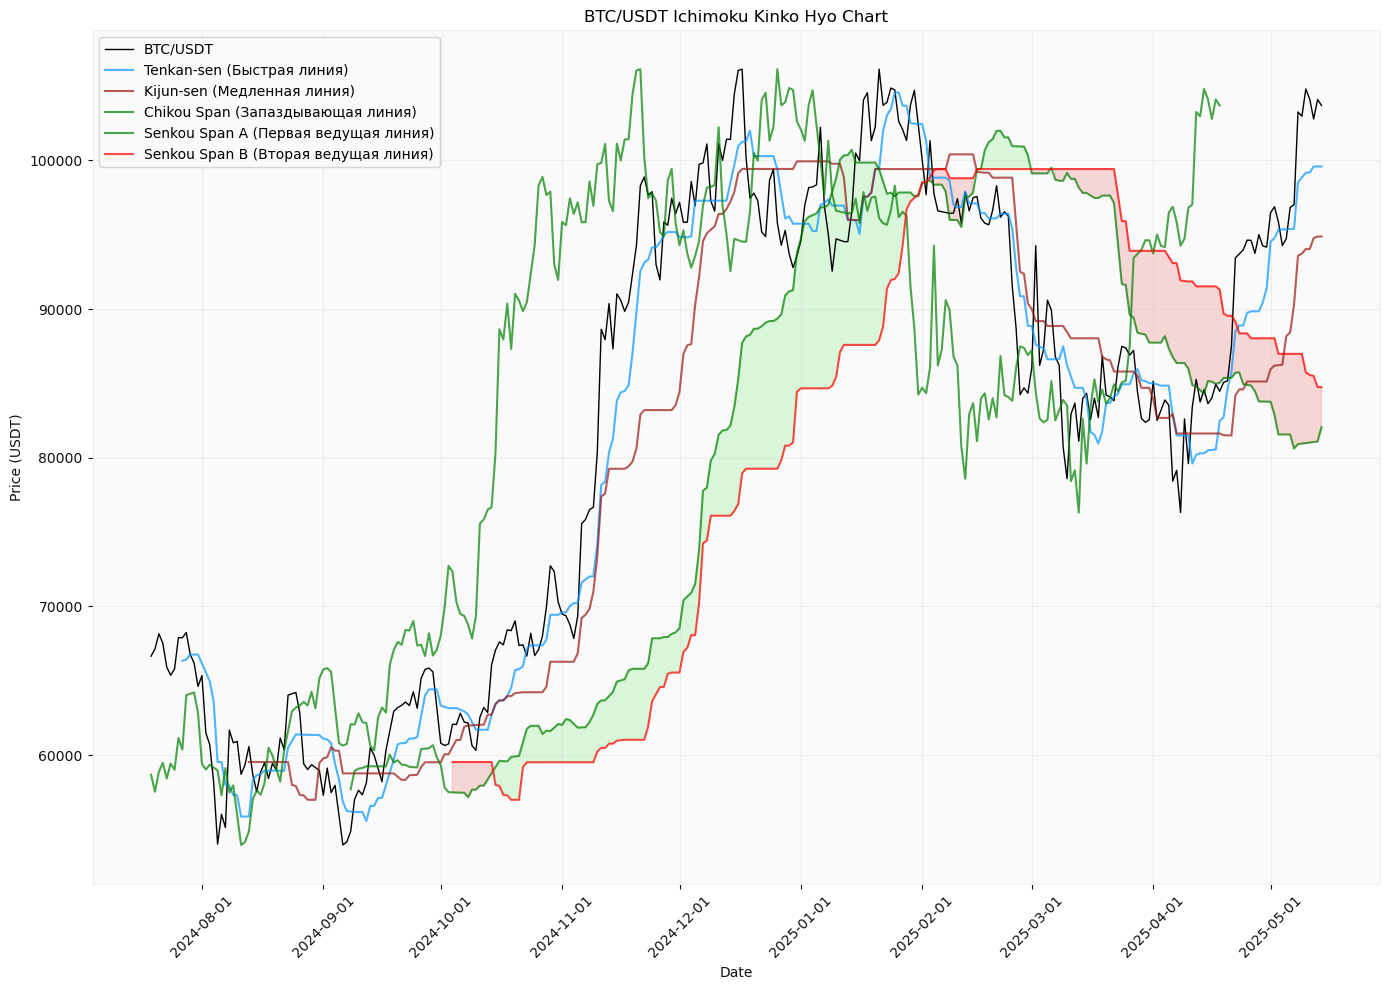

Plotting Ichimoku chart with mplfinance (better candlesticks)...
Done! Chart saved as 'btc_ichimoku.png' and possibly 'btc_ichimoku_mplfinance.png'


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import requests
import mplfinance as mpf

def get_btc_data_from_binance(symbol='BTCUSDT', interval='1d', limit=500):
    """
    Fetch BTC historical data from Binance public API
    """
    url = f'https://api.binance.com/api/v3/klines'
    params = {
        'symbol': symbol,
        'interval': interval,
        'limit': limit
    }
    
    response = requests.get(url, params=params)
    data = response.json()
    
    # Create DataFrame from the response
    df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 
                                     'volume', 'close_time', 'quote_asset_volume', 
                                     'number_of_trades', 'taker_buy_base_asset_volume', 
                                     'taker_buy_quote_asset_volume', 'ignore'])
    
    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    # Convert string values to float
    numeric_columns = ['open', 'high', 'low', 'close', 'volume']
    df[numeric_columns] = df[numeric_columns].astype(float)
    
    # Set timestamp as index
    df.set_index('timestamp', inplace=True)
    
    return df

def calculate_ichimoku(df):
    """
    Calculate Ichimoku Kinko Hyo components
    """
    # Быстрая линия (Tenkan-sen): (9-period high + 9-period low)/2
    nine_period_high = df['high'].rolling(window=9).max()
    nine_period_low = df['low'].rolling(window=9).min()
    df['tenkan_sen'] = (nine_period_high + nine_period_low) / 2
    
    # Медленная линия (Kijun-sen): (26-period high + 26-period low)/2
    period26_high = df['high'].rolling(window=26).max()
    period26_low = df['low'].rolling(window=26).min()
    df['kijun_sen'] = (period26_high + period26_low) / 2
    
    # Первая ведущая линия (Senkou Span A): (Conversion Line + Base Line)/2 (plotted 26 periods ahead)
    df['senkou_span_a'] = ((df['tenkan_sen'] + df['kijun_sen']) / 2).shift(26)
    
    # Вторая ведущая линия (Senkou Span B): (52-period high + 52-period low)/2 (plotted 26 periods ahead)
    period52_high = df['high'].rolling(window=52).max()
    period52_low = df['low'].rolling(window=52).min()
    df['senkou_span_b'] = ((period52_high + period52_low) / 2).shift(26)
    
    # Запаздывающая линия (Chikou Span): Close plotted 26 periods behind
    df['chikou_span'] = df['close'].shift(-26)
    
    return df

def plot_ichimoku(df, title='BTC/USDT Ichimoku Kinko Hyo Chart'):
    """
    Plot Ichimoku Kinko Hyo chart
    """
    # Prepare the plot
    plt.figure(figsize=(14, 10))
    
    # Plot candlestick chart
    ax1 = plt.subplot2grid((1, 1), (0, 0))
    
    # Format dates on x-axis
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    
    # Plot price and Ichimoku components
    ax1.plot(df.index, df['close'], label='BTC/USDT', linewidth=1, color='black')
    ax1.plot(df.index, df['tenkan_sen'], label='Tenkan-sen (Быстрая линия)', color='#0496ff', alpha=0.7)
    ax1.plot(df.index, df['kijun_sen'], label='Kijun-sen (Медленная линия)', color='#991515', alpha=0.7)
    ax1.plot(df.index, df['chikou_span'], label='Chikou Span (Запаздывающая линия)', color='green', alpha=0.7)
    
    # Plot Senkou Span (Cloud)
    ax1.fill_between(df.index, df['senkou_span_a'], df['senkou_span_b'], 
                     where=df['senkou_span_a'] >= df['senkou_span_b'], color='lightgreen', alpha=0.3)
    ax1.fill_between(df.index, df['senkou_span_a'], df['senkou_span_b'], 
                     where=df['senkou_span_a'] < df['senkou_span_b'], color='lightcoral', alpha=0.3)
    
    ax1.plot(df.index, df['senkou_span_a'], label='Senkou Span A (Первая ведущая линия)', color='green', alpha=0.7)
    ax1.plot(df.index, df['senkou_span_b'], label='Senkou Span B (Вторая ведущая линия)', color='red', alpha=0.7)
    
    # Add grid, legend, title and labels
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='best')
    plt.title(title)
    plt.ylabel('Price (USDT)')
    plt.xlabel('Date')
    
    # Adjust layout and save figure
    plt.tight_layout()
    plt.savefig('btc_ichimoku.png')
    plt.show()

def plot_ichimoku_mplfinance(df, title='BTC/USDT Ichimoku Kinko Hyo Chart'):
    """
    Plot Ichimoku Kinko Hyo chart using mplfinance (better candlesticks)
    """
    # Prepare data for mplfinance
    df_mpf = df[['open', 'high', 'low', 'close', 'volume']].copy()
    
    # Create Ichimoku plots
    ichimoku = [
        mpf.make_addplot(df['tenkan_sen'], color='#0496ff', width=1),
        mpf.make_addplot(df['kijun_sen'], color='#991515', width=1),
        mpf.make_addplot(df['senkou_span_a'], color='green', width=1),
        mpf.make_addplot(df['senkou_span_b'], color='red', width=1),
        mpf.make_addplot(df['chikou_span'], color='green', width=1)
    ]
    
    # Define fill colors for the cloud
    fill_colors = []
    for i in range(len(df)):
        if df['senkou_span_a'].iloc[i] >= df['senkou_span_b'].iloc[i]:
            fill_colors.append('lightgreen')
        else:
            fill_colors.append('lightcoral')
    
    # Plot with mplfinance
    mpf.plot(df_mpf, type='candle', style='yahoo', title=title,
             addplot=ichimoku, volume=True, figsize=(14, 10),
             fill_between=[dict(y1=df['senkou_span_a'].values, y2=df['senkou_span_b'].values,
                               color=fill_colors, alpha=0.3)],
             savefig='btc_ichimoku_mplfinance.png')

def main():
    # Get data from Binance
    print("Fetching BTC data from Binance API...")
    df = get_btc_data_from_binance(limit=300)
    
    # Calculate Ichimoku components
    print("Calculating Ichimoku Kinko Hyo indicators...")
    df = calculate_ichimoku(df)
    
    # Plot using standard matplotlib
    print("Plotting Ichimoku chart...")
    plot_ichimoku(df)
    
    # Plot using mplfinance (better looking candlesticks)
    try:
        print("Plotting Ichimoku chart with mplfinance (better candlesticks)...")
        plot_ichimoku_mplfinance(df)
    except Exception as e:
        print(f"Error plotting with mplfinance: {e}")
        print("Falling back to standard matplotlib plot.")
    
    print("Done! Chart saved as 'btc_ichimoku.png' and possibly 'btc_ichimoku_mplfinance.png'")

if __name__ == "__main__":
    main()

## Линейная регрессия в анализе тренда

это статистический метод, который в техническом анализе используется для определения направления и силы тренда

$Y = a + bX$, где:

* Y — цена актива
* X — время (периоды)
* a — точка пересечения с осью Y (начальное значение)
* b — наклон линии (скорость изменения цены)

### Определение направления тренда:
* Положительный наклон (b > 0) указывает на восходящий тренд
* Отрицательный наклон (b < 0) указывает на нисходящий тренд
* Наклон, близкий к нулю, свидетельствует о боковом движении

### Измерение силы тренда:
* Более крутой наклон означает более сильный тренд
* Изменение наклона может сигнализировать об ускорении или замедлении тренда

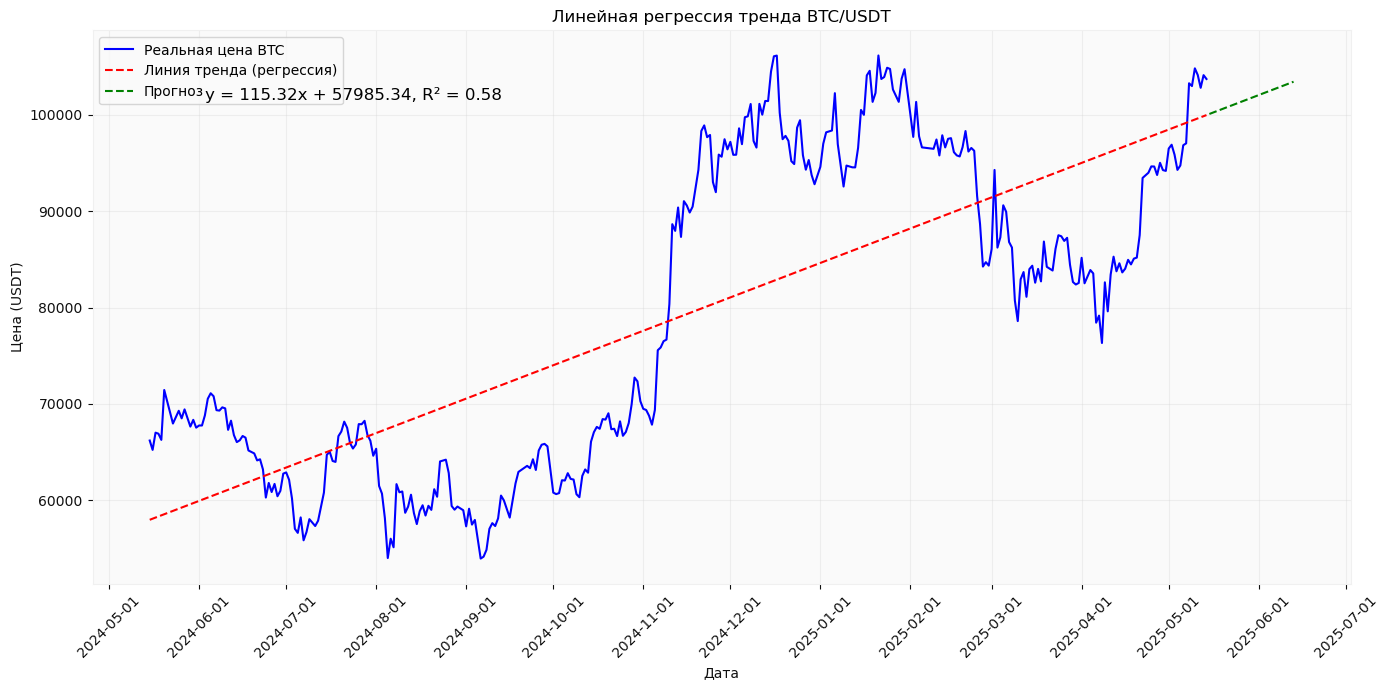

Наклон линии тренда: 115.32
Коэффициент детерминации (R²): 0.5754
Текущая цена BTC: 103705.63 USDT
Прогнозная цена через 30 дней: 103422.32 USDT


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from binance.client import Client
from sklearn.linear_model import LinearRegression
import datetime
import matplotlib.dates as mdates

# Инициализация клиента Binance (без ключей для публичного API)
client = Client("", "")

# Получение исторических данных BTCUSDT
klines = client.get_historical_klines(
    symbol="BTCUSDT",
    interval=Client.KLINE_INTERVAL_1DAY,  # дневные свечи
    start_str="1 year ago"  # данные за последний год
)

# Преобразование данных в DataFrame
df = pd.DataFrame(klines, columns=[
    'open_time', 'open', 'high', 'low', 'close', 'volume',
    'close_time', 'quote_asset_volume', 'number_of_trades',
    'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
])

# Преобразование типов данных
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
df['close'] = df['close'].astype(float)

# Подготовка данных для линейной регрессии
X = np.array(range(len(df))).reshape(-1, 1)  # индексы дней как независимая переменная
y = df['close'].values  # цена закрытия как зависимая переменная

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Прогнозы на основе модели
df['prediction'] = model.predict(X)

# Прогноз на будущие 30 дней
future_days = 30
future_indices = np.array(range(len(df), len(df) + future_days)).reshape(-1, 1)
future_predictions = model.predict(future_indices)

# Создание DataFrame для будущих прогнозов
last_date = df['open_time'].iloc[-1]
future_dates = [last_date + datetime.timedelta(days=i+1) for i in range(future_days)]
future_df = pd.DataFrame({
    'open_time': future_dates,
    'prediction': future_predictions
})

# Визуализация
plt.figure(figsize=(14, 7))
plt.plot(df['open_time'], df['close'], label='Реальная цена BTC', color='blue')
plt.plot(df['open_time'], df['prediction'], label='Линия тренда (регрессия)', color='red', linestyle='--')
plt.plot(future_df['open_time'], future_df['prediction'], label='Прогноз', color='green', linestyle='--')

# Настройка графика
plt.title('Линейная регрессия тренда BTC/USDT')
plt.xlabel('Дата')
plt.ylabel('Цена (USDT)')
plt.grid(True, alpha=0.3)
plt.legend()

# Форматирование оси X для лучшего отображения дат
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Получение коэффициентов линейной регрессии для отображения уравнения
slope = model.coef_[0]
intercept = model.intercept_

# Вычисление R² (коэффициент детерминации)
r_squared = model.score(X, y)

# Добавление уравнения и R² на график
equation = f'y = {slope:.2f}x + {intercept:.2f}, R² = {r_squared:.2f}'
plt.figtext(0.15, 0.85, equation, fontsize=12)

plt.tight_layout()
plt.savefig('btc_trend_analysis.png')
plt.show()

# Вывод статистики
print(f"Наклон линии тренда: {slope:.2f}")
print(f"Коэффициент детерминации (R²): {r_squared:.4f}")
print(f"Текущая цена BTC: {df['close'].iloc[-1]:.2f} USDT")
print(f"Прогнозная цена через 30 дней: {future_predictions[-1]:.2f} USDT")

### 1. Сначала данные подготавливаются для линейной регрессии:
$X = np.array(range(len(df))).reshape(-1, 1)$  # индексы дней как независимая переменная

$y = df['close'].values$  # цена закрытия как зависимая переменная


### 2. Затем создается и обучается модель

$model = LinearRegression()$

$model.fit(X, y)$

### 3. После обучения наклон линии (b) извлекается из модели как model.coef_[0]
$slope = model.coef_[0]$


## Расчет наклона линейной регрессии
$$b = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$$

где:
- $x_i$ - значение независимой переменной (в данном случае индекс дня)
- $y_i$ - значение зависимой переменной (цена закрытия Bitcoin)
- $\bar{x}$ - среднее значение всех $x_i$
- $\bar{y}$ - среднее значение всех $y_i$
- $n$ - количество наблюдений (дней)

# Стратегия для тренда

Получение исторических данных...
ПОКУПКА: 2025-01-03 16:00:00 | Цена: 97868.20 | BTC: 0.10207606 | Баланс: 0.00 USDT
ПРОДАЖА: 2025-01-04 10:00:00 | Цена: 97789.32 | BTC: 0.10207606 | Баланс: 9971.97 USDT
ПОКУПКА: 2025-01-04 20:00:00 | Цена: 98599.02 | BTC: 0.10103543 | Баланс: 0.00 USDT
ПРОДАЖА: 2025-01-05 10:00:00 | Цена: 97737.48 | BTC: 0.10103543 | Баланс: 9865.07 USDT
ПОКУПКА: 2025-01-05 21:00:00 | Цена: 98496.52 | BTC: 0.10005641 | Баланс: 0.00 USDT
ПРОДАЖА: 2025-01-07 10:00:00 | Цена: 101406.78 | BTC: 0.10005641 | Баланс: 10136.25 USDT
ПОКУПКА: 2025-01-10 05:00:00 | Цена: 93956.83 | BTC: 0.10777413 | Баланс: 0.00 USDT
ПРОДАЖА: 2025-01-11 03:00:00 | Цена: 94206.95 | BTC: 0.10777413 | Баланс: 10142.92 USDT
ПОКУПКА: 2025-01-11 16:00:00 | Цена: 94448.14 | BTC: 0.10728402 | Баланс: 0.00 USDT
ПРОДАЖА: 2025-01-12 08:00:00 | Цена: 94170.01 | BTC: 0.10728402 | Баланс: 10092.83 USDT
ПОКУПКА: 2025-01-12 17:00:00 | Цена: 95139.45 | BTC: 0.10597856 | Баланс: 0.00 USDT
ПРОДАЖА: 2025-01-13 02:0

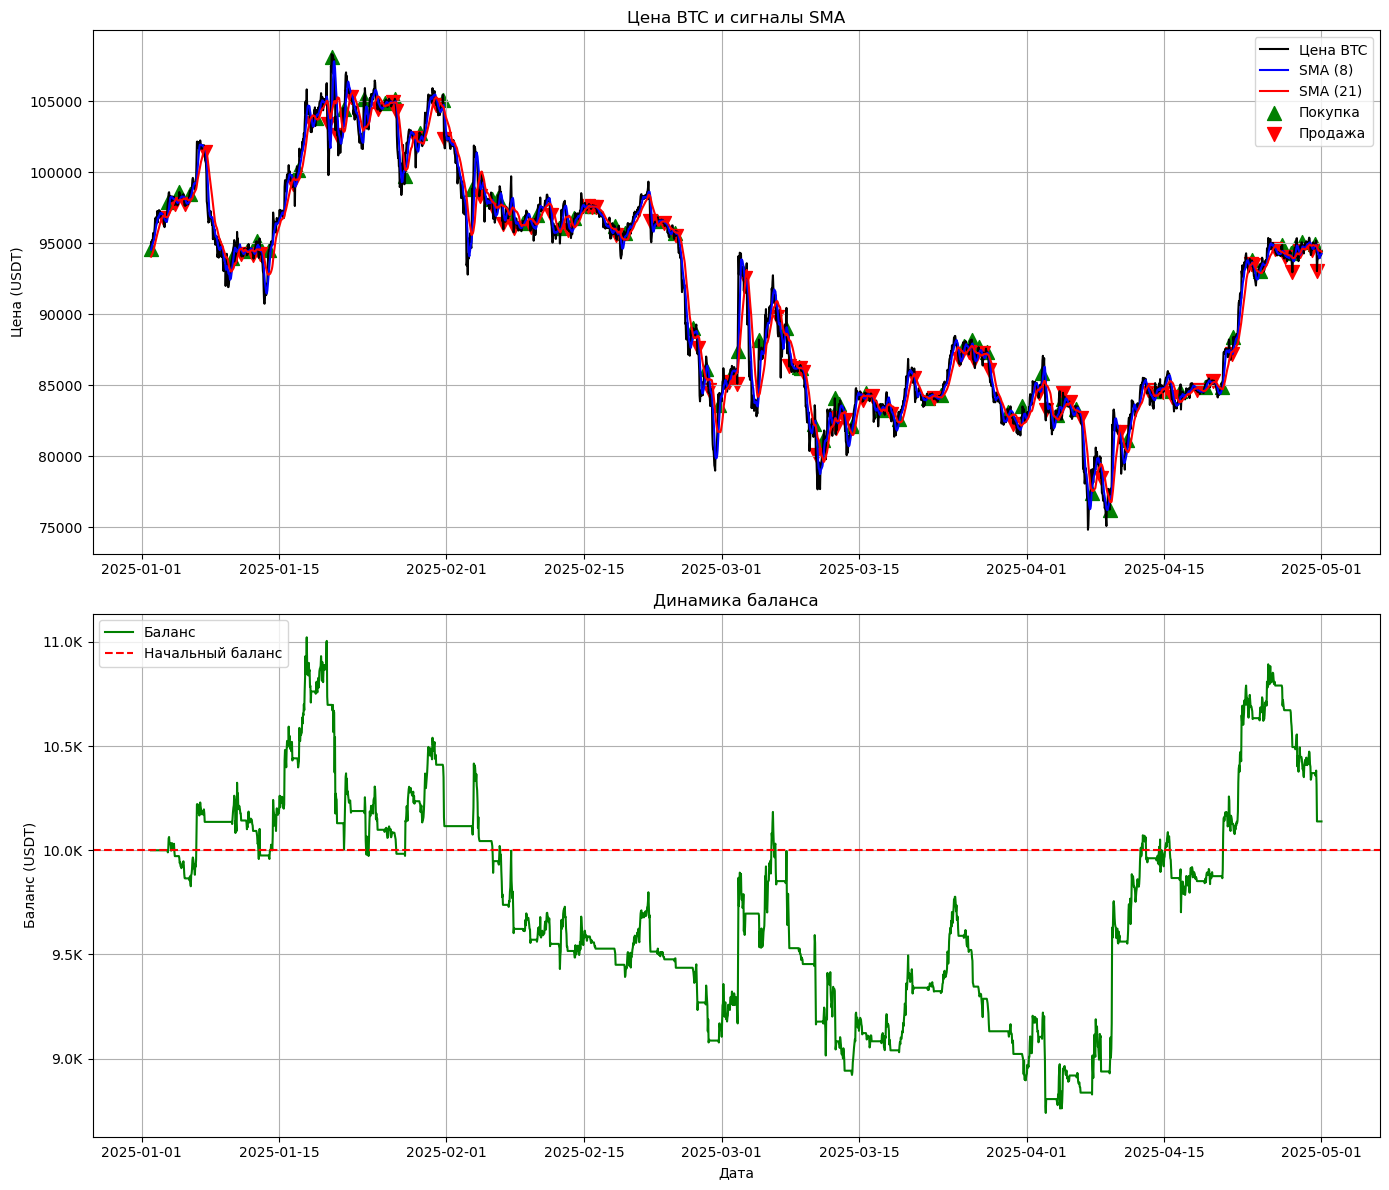

Список сделок сохранен в файл btc_sma_strategy_trades.csv


In [3]:
import pandas as pd
import numpy as np
import ccxt
import time
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Настройка параметров
symbol = 'BTC/USDT'       # Торговая пара
timeframe = '1h'          # Таймфрейм
start_date = '2025-01-01 00:00:00'  # Начальная дата
end_date = '2025-05-01 00:00:00'    # Конечная дата
short_window = 8          # Короткая SMA (периоды)
long_window = 21          # Длинная SMA (периоды)
initial_balance = 10000   # Начальный баланс в USDT
fee = 0.001               # Комиссия 0.1%

# Преобразование дат в миллисекунды для API Binance
start_timestamp = int(datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S').timestamp() * 1000)
end_timestamp = int(datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S').timestamp() * 1000)

# Инициализация биржи Binance
exchange = ccxt.binance({
    'enableRateLimit': True,  # Чтобы не превысить лимиты API
})

# Функция для получения исторических данных с учетом ограничений API
def fetch_all_ohlcv(exchange, symbol, timeframe, since, limit=1000):
    all_candles = []
    now = exchange.milliseconds()
    
    # Получаем данные по частям, в пределах лимитов API
    while since < min(now, end_timestamp):
        try:
            candles = exchange.fetch_ohlcv(symbol, timeframe, since, limit)
            if len(candles) == 0:
                break
            
            # Добавляем полученные свечи
            all_candles.extend(candles)
            
            # Обновляем timestamp для следующего запроса
            since = candles[-1][0] + 1
            
            # Небольшая задержка, чтобы не превысить лимиты API
            time.sleep(exchange.rateLimit / 1000)
            
        except Exception as e:
            print(f"Ошибка при запросе данных: {e}")
            break
    
    return all_candles

# Получение исторических данных
print("Получение исторических данных...")
candles = fetch_all_ohlcv(exchange, symbol, timeframe, start_timestamp)

# Преобразование данных в DataFrame
df = pd.DataFrame(candles, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

# Отфильтруем данные в соответствии с заданным диапазоном дат
df = df[(df.index >= start_date) & (df.index <= end_date)]

# Расчет скользящих средних
df['short_sma'] = df['close'].rolling(window=short_window).mean()
df['long_sma'] = df['close'].rolling(window=long_window).mean()

# Определение сигналов
df['signal'] = 0
df['signal'] = np.where(df['short_sma'] > df['long_sma'], 1, 0)
df['position'] = df['signal'].diff()

# Удаляем строки с NaN значениями (в начале из-за расчета скользящих средних)
df = df.dropna()

# Бэктестинг
def backtest(df, initial_balance, fee):
    balance = initial_balance
    btc_amount = 0
    trades = []
    balance_history = [initial_balance]
    
    for i in range(1, len(df)):
        current_price = df['close'].iloc[i]
        current_time = df.index[i]
        
        if df['position'].iloc[i] == 1:  # Покупка (золотое пересечение)
            if balance > 0:
                # Вычисляем, сколько BTC можем купить (учитывая комиссию)
                btc_to_buy = (balance * (1 - fee)) / current_price
                btc_amount = btc_to_buy
                cost = balance
                balance = 0
                trades.append({
                    'time': current_time,
                    'type': 'buy',
                    'price': current_price,
                    'btc_amount': btc_amount,
                    'cost': cost,
                    'balance_after': balance,
                })
                print(f"ПОКУПКА: {current_time} | Цена: {current_price:.2f} | BTC: {btc_amount:.8f} | Баланс: {balance:.2f} USDT")
        
        elif df['position'].iloc[i] == -1:  # Продажа (мертвое пересечение)
            if btc_amount > 0:
                # Продаем весь имеющийся BTC (учитывая комиссию)
                balance = btc_amount * current_price * (1 - fee)
                trades.append({
                    'time': current_time,
                    'type': 'sell',
                    'price': current_price,
                    'btc_amount': btc_amount,
                    'proceeds': balance,
                    'balance_after': balance,
                })
                print(f"ПРОДАЖА: {current_time} | Цена: {current_price:.2f} | BTC: {btc_amount:.8f} | Баланс: {balance:.2f} USDT")
                btc_amount = 0
        
        # Рассчитаем текущий общий баланс (в USDT)
        total_balance = balance + (btc_amount * current_price if btc_amount > 0 else 0)
        balance_history.append(total_balance)
    
    # Если в конце периода остался BTC, конвертируем его в USDT для итогового подсчета
    if btc_amount > 0:
        final_price = df['close'].iloc[-1]
        balance += btc_amount * final_price * (1 - fee)
        btc_amount = 0
    
    return balance, trades, balance_history

# Запуск бэктестинга
final_balance, trades, balance_history = backtest(df, initial_balance, fee)

# Расчет статистики
profit = final_balance - initial_balance
profit_percentage = (profit / initial_balance) * 100
num_trades = len(trades)
winning_trades = sum(1 for trade in trades if trade['type'] == 'sell' and trade['proceeds'] > trade.get('cost', 0))
losing_trades = num_trades - winning_trades if num_trades > 0 else 0
win_rate = (winning_trades / (num_trades // 2)) * 100 if num_trades > 0 else 0

# Вывод результатов
print("\n==== РЕЗУЛЬТАТЫ БЭКТЕСТИНГА ====")
print(f"Период: {start_date} - {end_date}")
print(f"Начальный баланс: {initial_balance:.2f} USDT")
print(f"Конечный баланс: {final_balance:.2f} USDT")
print(f"Прибыль: {profit:.2f} USDT ({profit_percentage:.2f}%)")
print(f"Количество сделок: {num_trades // 2}")
print(f"Выигрышных сделок: {winning_trades} ({win_rate:.2f}%)")
print(f"Проигрышных сделок: {losing_trades} ({100 - win_rate:.2f}%)")

# Визуализация результатов
plt.figure(figsize=(14, 12))

# График 1: Цены и SMA
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['close'], label='Цена BTC', color='black')
ax1.plot(df.index, df['short_sma'], label=f'SMA ({short_window})', color='blue')
ax1.plot(df.index, df['long_sma'], label=f'SMA ({long_window})', color='red')

# Отметка сигналов на графике
buy_signals = df[df['position'] == 1]
sell_signals = df[df['position'] == -1]
ax1.scatter(buy_signals.index, buy_signals['close'], marker='^', color='green', s=100, label='Покупка')
ax1.scatter(sell_signals.index, sell_signals['close'], marker='v', color='red', s=100, label='Продажа')

ax1.set_title('Цена BTC и сигналы SMA')
ax1.set_ylabel('Цена (USDT)')
ax1.grid(True)
ax1.legend()

# График 2: Динамика баланса
ax2 = plt.subplot(2, 1, 2)
ax2.plot(df.index[:len(balance_history)], balance_history, label='Баланс', color='green')
ax2.axhline(y=initial_balance, color='r', linestyle='--', label='Начальный баланс')
ax2.set_title('Динамика баланса')
ax2.set_xlabel('Дата')
ax2.set_ylabel('Баланс (USDT)')

# Форматирование оси Y для отображения тысяч
formatter = FuncFormatter(lambda x, pos: f'{x/1000:.1f}K' if x >= 1000 else f'{x:.0f}')
ax2.yaxis.set_major_formatter(formatter)

ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.savefig('btc_sma_strategy_results.png')
plt.show()

# Сохранение данных о сделках
trades_df = pd.DataFrame(trades)
if not trades_df.empty:
    trades_df.to_csv('btc_sma_strategy_trades.csv', index=False)
    print("Список сделок сохранен в файл btc_sma_strategy_trades.csv")

## Основа стратегии
Стратегия основана на пересечении двух простых скользящих средних (SMA):
* Короткая SMA (8 периодов): отражает краткосрочный тренд
* Длинная SMA (21 период): представляет среднесрочный тренд

### Сигнал на покупку (Long):
* Основной сигнал: Короткая SMA пересекает длинную SMA снизу вверх ("золотое пересечение")
* Подтверждение: Цена закрытия находится выше обеих SMA

### Правила выхода из позиции
* Короткая SMA пересекает длинную SMA сверху вниз ("мертвое пересечение")
